# Code for collocations in newspapers

Some startup code, make sure to activate

In [2]:
import dhlab.module_update as mu
mu.update('dhlab_v2', silent = True)
import dhlab_v2 as d2

import pandas as pd

In [3]:
mu.css()

In [4]:
from random import sample

In [5]:
def sampling(a, b):
    res = a
    if b < len(a):
        res = sample(a, b)
    return res

In [6]:
def sort(df, col = None, up = True):
    if col is None:
        col = df.columns[0]
    return df.sort_values(by = col, ascending = (up == False))
    

In [7]:
def check_words(df, word_parts):
    """ do a df.loc[] on matches for word_parts - a kindof regex search through matches"""
    return pd.concat([df.loc[i] for i in [df[a].index for a in [df.index.str.contains(w) for w in word_parts]]])

# Setting things up
Set up the data for analysis, totals and a collocation function

In [8]:
tot = d2.totals(250000)

In [9]:
tot

,freq
.,979338199
",",822864040
og,452140452
i,395027518
som,221343681
...,...
venstrefoten,1752
vegetasjonsseksjon,1752
utmeldinger,1752
utekkelig,1752


With collocations, the information association is computed using PMI (pointwise mutual information), with probabilites as proportions of frequency, it takes the form: $pmi(x,y) = \frac{p(x|y)}{p(x)} = \frac{p(y|x)}{p(y)}$. It is a probabilistic version of relevance. That $y$ is relevant for $x$ and vice versa. PMI is used instead of $\text{tf-idf}$ for computing associations between words.

The PMI-values are computed on normalized frequencies, which means that the actual number can be interpreted as a disproportion number.

In [21]:
def collocation(word, before = 20, after = 20, corpus = None, samples = 500000, totals = tot ):
    """ Collocations from counts - no distance here"""
    coll = d2.urn_collocation(urns = sampling(list(corpus.urn), samples), word = word, before = before, after = after)[['counts']]
    combo = pd.concat([coll.counts, totals.freq], axis = 1)
    combo.freq = combo.freq.fillna(min(combo.freq))
    combo['pmi'] = (combo.counts/combo.counts.sum())/(combo.freq/combo.freq.sum())
    return combo

## Build a corpus

The target corpus consists of newspapers published in Norway between 2020 and 2021

In [11]:
corpus = d2.document_corpus(doctype = 'digavis', from_year = 2020, to_year = 2021, limit = 100000)

# corpus avis

In [12]:
#set(list(corpus.title))

Check how many documents there are in the corpus

In [13]:
len(corpus)

43490

Substitute the red string below with any substring describing a newspaper, to see how many are included

In [14]:
len(corpus[corpus.urn.str.contains('vennesla')])

121

# Concordances

In [15]:
conc = d2.concordance(urns = list(corpus.urn), words = "NEAR(korona vaksine, 20)", limit = 100)

In [16]:
len(conc)

689

In [25]:
conc.sample(10).style

,docid,urn,conc
192,202392147,URN:NBN:no-nb_digavis_haugesundsavis_null_null_20210311_127_59_1,"Er du mellom 18 – 64 år , registrer deg for vaksine mot korona . Gå inn på www.haugesund . kommune.no og trykk på knappen for vaksineregistrering ."
664,202795650,URN:NBN:no-nb_digavis_stavangeraftenblad_null_null_20210304_129_0_1,"KORONA : Danskene vil samarbeide med israelerne , ungarerne bruker en kinesisk vaksine og gamle østblokkland vender tilbake til Russland ."
607,202832768,URN:NBN:no-nb_digavis_tonsbergsblad_null_null_20201211_151_290_1,... Norge vil få tilgang på vaksine mot korona via Sverige og i et samarbeid med EU . EU-kommisjonen inkluderte Norge i sin vaksinestrategi i juni...
447,201946067,URN:NBN:no-nb_digavis_aftenposten_null_null_20210301_162_50_1,"... samfunnsskadelige følger . « Korona-trettheten » som gjør seg gjeldende i mange land , vil gjøre nedstengningstiltak over tid mindre efektive . Einhorn skriver at « En vaksine kan ikke..."
633,202810881,URN:NBN:no-nb_digavis_sunnhordland_null_null_20201021_118_115_1,"... oppmodinga om å ta vaksine i år , er at ein fryktar for følgjene dersom folk pådrar seg både influensa og korona samstundes . Eit anna problem..."
618,202811319,URN:NBN:no-nb_digavis_sunnmoringen_null_null_20210113_75_3_1,VAKSINE : Vaksineringa mot korona er i gang . FOTO : SYKKYLVEN KOMMUNE
479,202733847,URN:NBN:no-nb_digavis_rogalandsavis_null_null_20210202_119_27_1,"... at Pfizer og Biontech er klar til å øke leveransene av korona- vaksine , og at EU vil få 75 millioner doser ekstra i 2. kvartal..."
35,202367412,URN:NBN:no-nb_digavis_hamararbeiderblad_null_null_20210217_96_40_1,Flest kvinner har fått korona-vaksine
477,202733692,URN:NBN:no-nb_digavis_rogalandsavis_null_null_20200801_118_177_1,... Vi begynner også å nærme oss en ferdig vaksine . Vi vet mye om immunresponsene og hvordan korona kan behandles på sykehus – selv om det fortsatt...
519,202857789,URN:NBN:no-nb_digavis_vaartland_null_null_20200923_76_222_1,... Det er den beste vaksinen . » Nylig erklærte Donald Trump at en korona-vaksine ville være klar om kort tid . Kan det bety at han har...


# Collocations

Try out different words to get a feel of things

In [24]:
coll = collocation(word = 'vaksine', before = 200, after = 200, corpus = corpus)

Change the green numbers to look at different parts. Note the high pmi values.

Sortere på frekvens etter å kuttet på pmi

In [26]:
sort(coll[coll.pmi > 100], 'pmi')[0:50]

,counts,freq,pmi
–,91689.0,32303.0,3890.449177
Pfizer,4492.0,1852.0,3324.483125
vaksinen,23455.0,10308.0,3118.791881
vaksinene,5467.0,2439.0,3072.293069
FHI,8235.0,3748.0,3011.545221
korona,3926.0,2372.0,2268.615934
2021,10686.0,7916.0,1850.268486
vaksine,33360.0,26247.0,1742.094615
risikogruppene,2193.0,1786.0,1682.993911
vaksinere,7168.0,6290.0,1561.970109


In [19]:
import dhlab.nbtext as nb

In [140]:
coll.loc['korona']

counts     2390.000000
pmi       18404.631287
Name: korona, dtype: float64

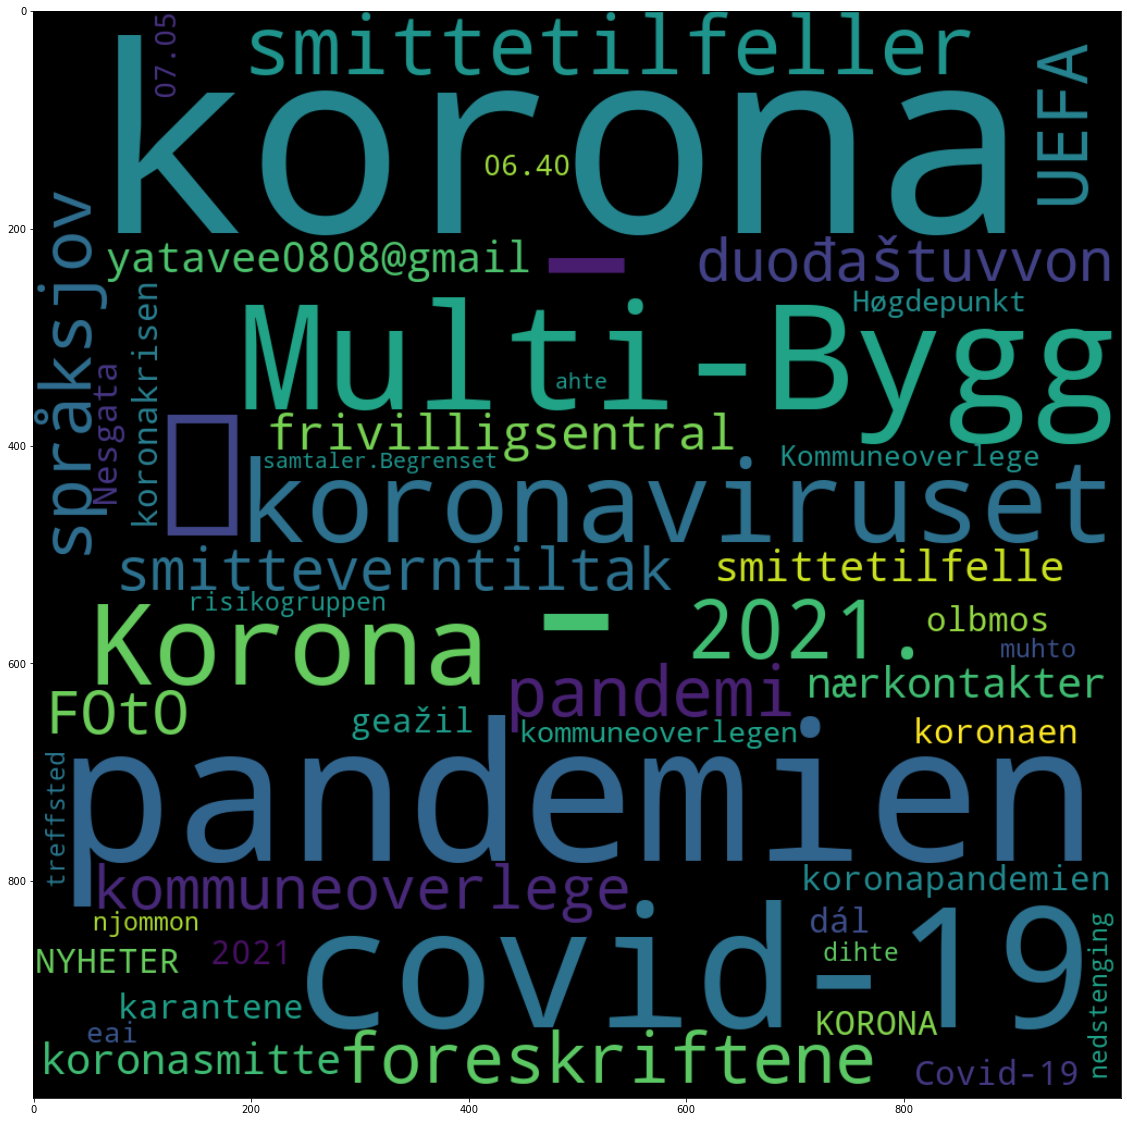

In [156]:
cld = lambda x = 0, y = 50: coll[['pmi']].sort_values(by = 'pmi', ascending = False)[x:y]/coll[['pmi']].sort_values(by = 'pmi', ascending = False)[x:y].sum()
nb.cloud(cld())

Check the pmi of certain words. These numbers may be added up and grouped by word type in order to boost a pmi value; event if they alone do not make an indent, they may if grouped. 

These words may be a source of their own statistics, for example by exploding the compounds into their parts.

In [148]:
len(coll)

101186

In [30]:
sort(check_words(coll[coll.pmi > 10], "pasienter".split()),'counts').head(50)

,counts,pmi
Kreftpasienter,1,310.315578


# Round 2

A new collocation. As for the collocation above, the context is 20 words in front and 20 trailing.

In [37]:
coll_forskning = collocation(word = 'forskning', corpus = corpus)

In [42]:
sort(coll_forskning, 'pmi')[1:20].style.background_gradient()

,counts,totfreq,pmi
kvinnehelse,339,1752.000000,2856.236533
Krafttak,291,1752.000000,2451.813661
●,256,1752.000000,2156.921984
­,238,1752.000000,2005.263407
Medox,189,1752.000000,1592.415058
kreftformene,183,1752.000000,1541.862199
pandemien,180,1752.000000,1516.585770
velvære-hormonet,172,1752.000000,1449.181958
covid-19,162,1752.000000,1364.927193
ytocin,153,1752.000000,1289.097904


In [43]:
sort(check_words(coll_forskning, "motstander corona korona".split()),'counts').head(50)

,counts,totfreq,pmi
koronaviruset,135,1752.0,1137.439327
korona,97,2372.0,603.650581
koronakrisen,63,1752.0,530.805019
koronapandemien,42,1752.0,353.870013
coronaviruset,36,1752.0,303.317154
koronavirus,36,1752.0,303.317154
koronaepidemien,31,1752.0,261.189771
koronaen,27,1752.0,227.487865
koronavaksine,24,1752.0,202.211436
koronavaksinen,19,1752.0,160.084053


# Compare the two collocations with respect to different words

The Norwegian word for "corona crisis" has a higher count with collocation for research than for vaccine. Something to investigate (is it relevant?).

In [54]:
coll[coll.index.str.contains('koro')]

,counts,pmi
koronaviruset,1,310.315578
koronavaksinestatistikk,1,310.315578
koronaStatuS,1,310.315578
korona,3,687.613271


In [45]:
coll_forskning.loc[['koronakrisen']]

,counts,totfreq,pmi
koronakrisen,63,1752.0,530.805019


# Round 3


In [46]:
coll_krisen = collocation(word = 'krisen', corpus = corpus)

In [47]:
sort(coll_krisen, 'pmi').head(50)

,counts,totfreq,pmi
toppfotballens,4,0.0,inf
AlMliD.l,2,0.0,inf
www.bademiljo,1,0.0,inf
cø4nfc,1,0.0,inf
avlønningssystemer,1,0.0,inf
KoMpetAnseforuM,1,0.0,inf
g?æ,1,0.0,inf
Digitalredaktør,1,0.0,inf
BIVAND,1,0.0,inf
poTSTups,1,0.0,inf


In [48]:
sort(check_words(coll_krisen, "motstander vaksine korona".split()),'counts').head(50)

,counts,totfreq,pmi
koronakrisen,913,0.0,inf
korona,559,2372.0,3008.739591
koronapandemien,378,0.0,inf
koronaviruset,357,0.0,inf
korona-,201,0.0,inf
koronaen,116,0.0,inf
vaksine,81,26247.0,39.399692
korona-krisen,72,0.0,inf
koronasituasjonen,70,0.0,inf
koronaepidemien,48,0.0,inf


In [49]:
d2.concordance(urns = sampling(list(corpus[corpus.urn.str.contains('aften')].urn), 3000), words = 'koronavaksine').head(50)

,docid,urn,conc
0,203413334,URN:NBN:no-nb_digavis_stavangeraftenblad_null_...,... Sju personer har søkt erstatning etter å h...
1,203413305,URN:NBN:no-nb_digavis_stavangeraftenblad_null_...,... FHIs smitteverndirektør Geir Bukholm tror ...
2,203413321,URN:NBN:no-nb_digavis_stavangeraftenblad_null_...,"... På grunn av mulige bivirkninger , har Norg..."
3,203413321,URN:NBN:no-nb_digavis_stavangeraftenblad_null_...,... Dahlan forsøkte tidligere i år å kjøpe seg...
4,203413361,URN:NBN:no-nb_digavis_stavangeraftenblad_null_...,... Av de 87 prosentene som svarer at de vil t...
5,203413326,URN:NBN:no-nb_digavis_stavangeraftenblad_null_...,... som spør om det bryter med fasten med å ta...
6,203413352,URN:NBN:no-nb_digavis_stavangeraftenblad_null_...,... I januar i år ble første dose med <b>koron...
7,203413329,URN:NBN:no-nb_digavis_stavangeraftenblad_null_...,"... Ønsker du <b>koronavaksine</b> , klikk på ..."
8,203413320,URN:NBN:no-nb_digavis_stavangeraftenblad_null_...,... Fastleger og vaksinestasjoner står parate ...
9,203413328,URN:NBN:no-nb_digavis_stavangeraftenblad_null_...,... Landet deltar i det FNstøttede Covax-initi...
